In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
import numpy as np

from networkx.drawing.nx_agraph import graphviz_layout

# %pylab inline

# Test NetworkX Library

/home/jhaas/Python_Envs36/default/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: r is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


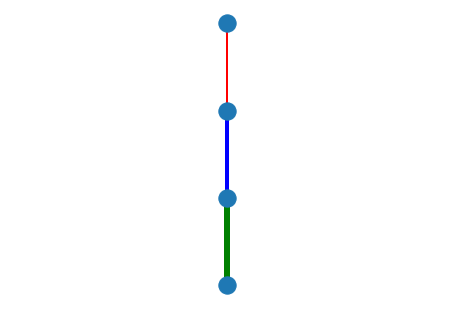

In [2]:
G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=6)

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights)

In [2]:
#https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [5]:

G = nx.DiGraph()

G.add_node("ROOT")

for i in range(10):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i, color='r', weight=2)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i, color='b', weight=4)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i, color='g', weight=6)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
# write_dot(G,'test.dot')

# same layout using matplotlib with no labels
# plt.title('draw_networkx')
# pos =graphviz_layout(G, prog='dot')
# nx.draw(G, pos, with_labels=False, arrows=True)
# plt.savefig('nx_test.png')

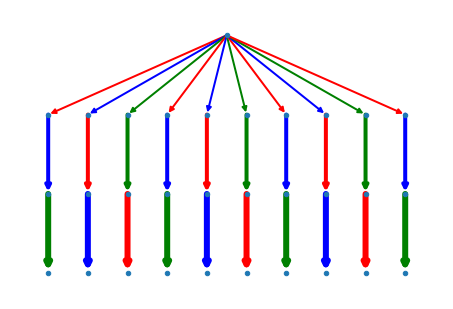

In [6]:
pos = hierarchy_pos(G,"ROOT")  

edges = G.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights, node_size=20)
# nx.draw(G, pos=pos, with_labels=False)

# Load Conductance Measures

In [3]:
val_attrib_conv1 = np.load('./zf_net_conductance/val_attri_conv1_.npy')
val_attrib_conv2 = np.load('./zf_net_conductance/val_attri_conv2_.npy')
val_attrib_conv3 = np.load('./zf_net_conductance/val_attri_conv3_.npy')
val_attrib_conv4 = np.load('./zf_net_conductance/val_attri_conv4_.npy')

val_labels_conv1 = np.load('./zf_net_conductance/val_labels_conv1_.npy')
val_labels_conv2 = np.load('./zf_net_conductance/val_labels_conv2_.npy')
val_labels_conv3 = np.load('./zf_net_conductance/val_labels_conv3_.npy')
val_labels_conv4 = np.load('./zf_net_conductance/val_labels_conv4_.npy')

In [157]:
# average attrib measures over images
    
conv1_frogs = np.mean(val_attrib_conv1[val_labels_conv1==0].astype(np.float64), axis=0)
conv1_frogs = conv1_frogs - (conv1_frogs.min())

conv2_frogs = np.mean(val_attrib_conv2[val_labels_conv2==0].astype(np.float64), axis=0)
conv2_frogs = conv2_frogs - (conv2_frogs.min())

conv3_frogs = np.mean(val_attrib_conv3[val_labels_conv3==0].astype(np.float64), axis=0)
conv3_frogs = conv3_frogs - (conv3_frogs.min())

conv4_frogs = np.mean(val_attrib_conv4[val_labels_conv4==0].astype(np.float64), axis=0)
conv4_frogs = conv4_frogs - (conv4_frogs.min())

conv1_horse = np.mean(val_attrib_conv1[val_labels_conv1==1].astype(np.float64), axis=0)
conv2_horse = np.mean(val_attrib_conv2[val_labels_conv2==1].astype(np.float64), axis=0)
conv3_horse = np.mean(val_attrib_conv3[val_labels_conv3==1].astype(np.float64), axis=0)
conv4_horse = np.mean(val_attrib_conv4[val_labels_conv4==1].astype(np.float64), axis=0)

In [158]:
conv1_frogs_mean = np.mean(val_attrib_conv1[val_labels_conv1 == 0].astype(np.float64), axis=0)
conv1_frogs_mean =  1 / (conv1_frogs_mean - (conv1_frogs_mean.min() - 1))

conv2_frogs_mean = np.mean(val_attrib_conv2[val_labels_conv2 == 0].astype(np.float64), axis=0)
conv2_frogs_mean =  1 / (conv2_frogs_mean - (conv2_frogs_mean.min() - 1))

conv3_frogs_mean = np.mean(val_attrib_conv3[val_labels_conv3 == 0].astype(np.float64), axis=0)
conv3_frogs_mean =  1 / (conv3_frogs_mean - (conv3_frogs_mean.min() - 1))

conv4_frogs_mean = np.mean(val_attrib_conv4[val_labels_conv4 == 0].astype(np.float64), axis=0)
conv4_frogs_mean =  1 / (conv4_frogs_mean - (conv4_frogs_mean.min() - 1))

In [145]:
np.mean(np.equal(np.argsort(conv4_frogs), np.argsort(conv4_frogs_mean)[::-1]))

1.0

In [7]:
conv1_frogs.shape[0] * conv2_frogs.shape[0] * conv3_frogs.shape[0]* conv4_frogs.shape[0]

3623878656

# Plot Attribution Paths

In [159]:
G = nx.DiGraph()

G.add_node("ROOT")
G.add_node("FOOT")

for i, l1_e in enumerate(conv1_frogs_mean[:20]):
    i_ = str(i) + "l1"
    G.add_node(i_)
    G.add_edge("ROOT", i_, weight=0.01)
    
    for j, l2_e in enumerate(conv2_frogs_mean[:20]):
        
        j_ = str(j) + "l2"
        path_mag = np.sum((np.abs(l1_e),np.abs(l2_e)))

        if (i==0):
            G.add_node(j_)
        
        G.add_edge(i_, j_, weight=path_mag)
                                   
        for k, l3_e in enumerate(conv3_frogs_mean[:10]):
        
            k_ = str(k) + "l3"
            path_mag = np.sum((np.abs(l2_e), np.abs(l3_e)))

            if (j==0):
                G.add_node(k_)
            
            G.add_edge(j_, k_, weight=path_mag)
        
            for l, l4_e in enumerate(conv4_frogs_mean[:20]):

                l_ = str(l) + "l4"
                path_mag = np.sum((np.abs(l3_e), np.abs(l4_e)))

                if (k==0):
                    G.add_node(l_)
                    G.add_edge(l_,"FOOT", weight=0.01)

                G.add_edge(k_, l_, weight=path_mag)

In [160]:
d = nx.dijkstra_path(G, 'ROOT', 'FOOT')

K = nx.shortest_simple_paths(G, 'ROOT', 'FOOT', 'weight')

In [161]:
d

['ROOT', '6l1', '2l2', '6l3', '10l4', 'FOOT']

In [76]:
n_shortest_paths = []
n = 5

for counter, path in enumerate(K):
    if counter > n:
        break
    n_shortest_paths.append(path)

In [77]:
n_shortest_paths

[['ROOT', '6l1', '2l2', '6l3', '10l4', 'FOOT'],
 ['ROOT', '6l1', '11l2', '6l3', '10l4', 'FOOT'],
 ['ROOT', '6l1', '2l2', '7l3', '10l4', 'FOOT'],
 ['ROOT', '6l1', '8l2', '6l3', '10l4', 'FOOT'],
 ['ROOT', '6l1', '11l2', '7l3', '10l4', 'FOOT'],
 ['ROOT', '6l1', '8l2', '7l3', '10l4', 'FOOT']]

In [213]:
def scale(vector, min=1, max=2):
    return (max - min)*((vector - vector.min()) / (vector.max() - vector.min())) + min

In [214]:
G = nx.DiGraph()

G.add_node("ROOT")
G.add_node("FOOT")

for i, l1_e in enumerate(scale(conv1_frogs[:20])):
    i_ = str(i) + "l1"
    G.add_node(i_)
    G.add_edge("ROOT", i_, weight=0.01)
    
    for j, l2_e in enumerate(scale(conv2_frogs[:20])):
        
        j_ = str(j) + "l2"
        path_mag = np.sum((np.abs(l1_e),np.abs(l2_e)))

        if (i==0):
            G.add_node(j_)
        
        G.add_edge(i_, j_, weight=path_mag)
                                   
        for k, l3_e in enumerate(scale(conv3_frogs[:10])):
        
            k_ = str(k) + "l3"
            path_mag = np.sum((np.abs(l2_e), np.abs(l3_e)))

            if (j==0):
                G.add_node(k_)
            
            G.add_edge(j_, k_, weight=path_mag)
        
            for l, l4_e in enumerate(scale(conv4_frogs[:20])):

                l_ = str(l) + "l4"
                path_mag = np.sum((np.abs(l3_e), np.abs(l4_e)))

                if (k==0):
                    G.add_node(l_)
                    G.add_edge(l_,"FOOT", weight=0.01)

                G.add_edge(k_, l_, weight=path_mag)

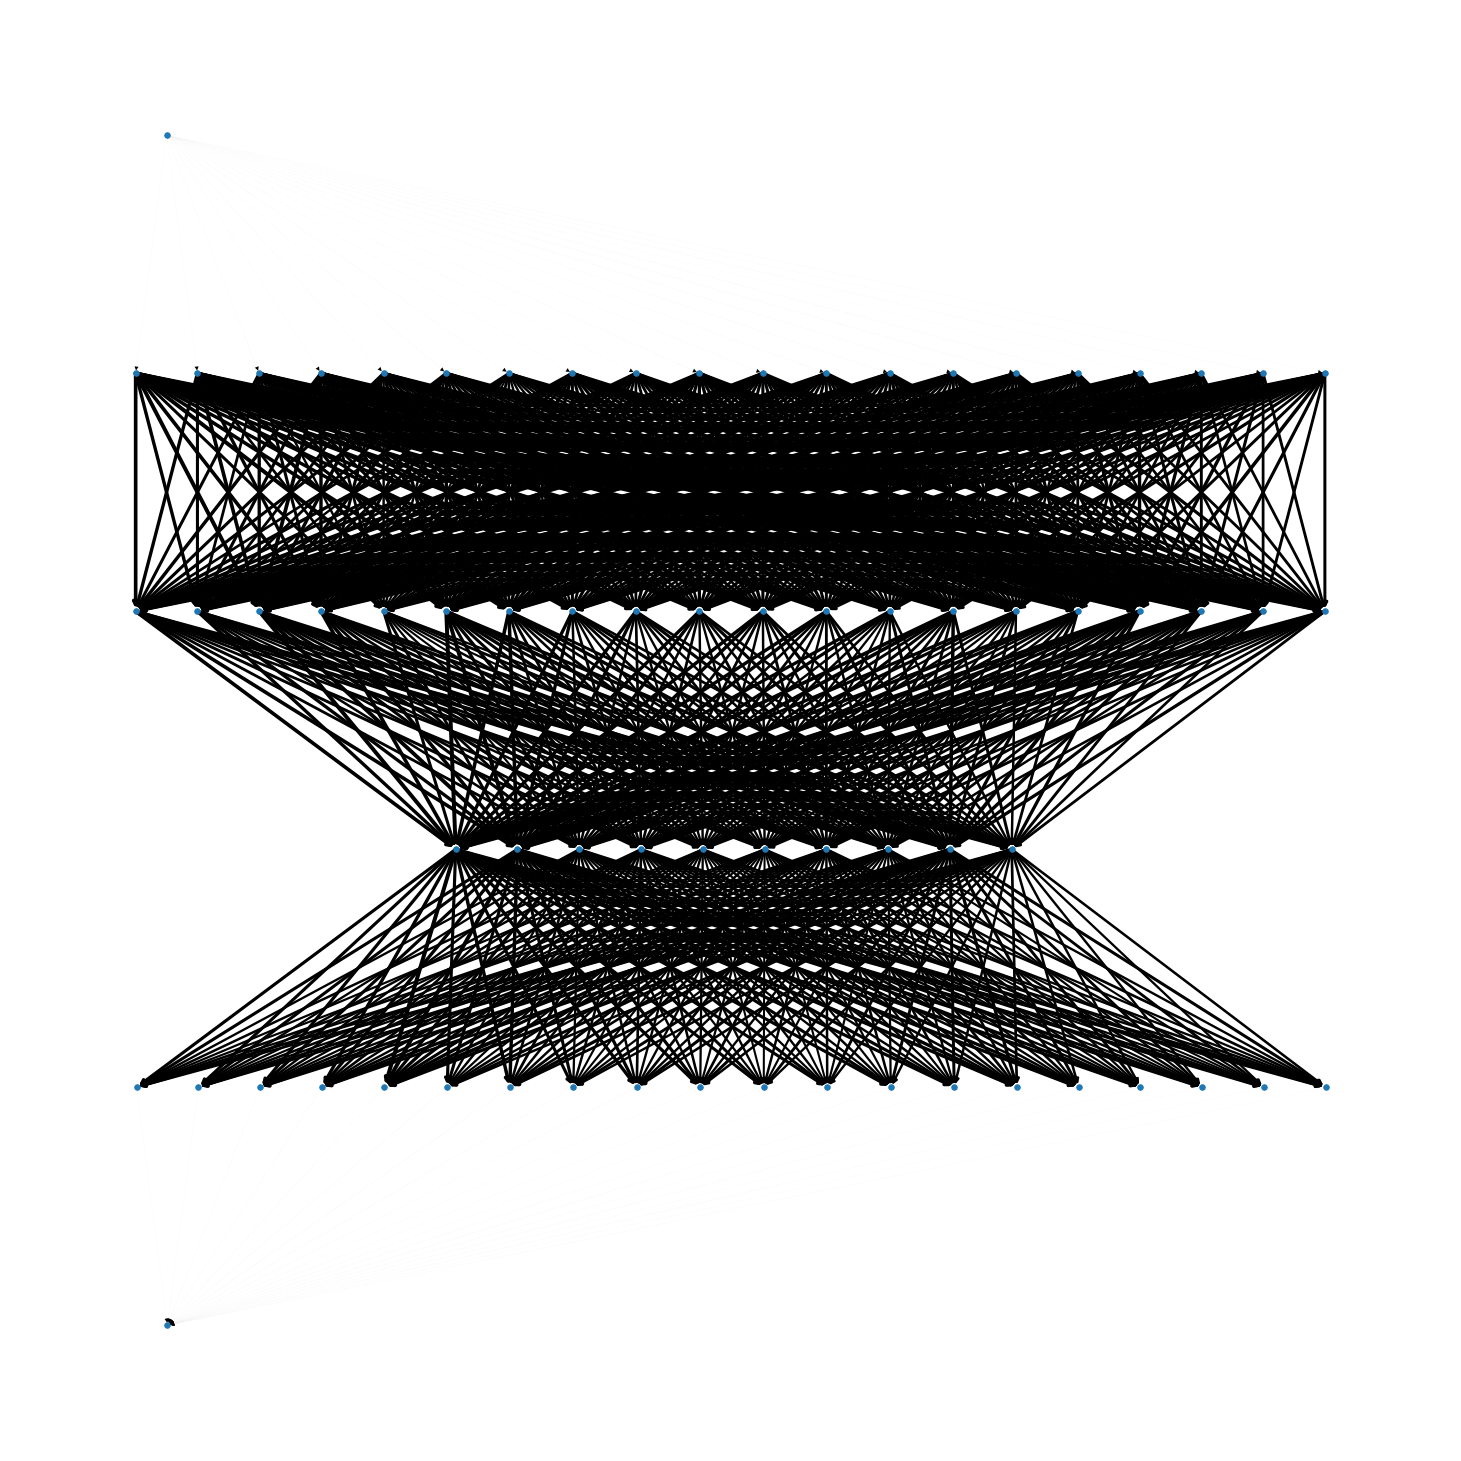

In [215]:
edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

plt.figure(figsize=(20,20))

pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, edges=edges, width=weights, with_labels=False, arrows=True, node_size=30)

In [199]:
np.min(conv4_frogs[:12]), np.max(conv4_frogs[:12])

(0.0032430939674377443, 0.008098892092704774)

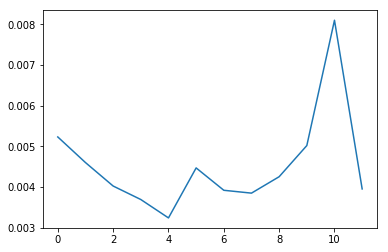

In [198]:
plt.plot(conv4_frogs[:12])

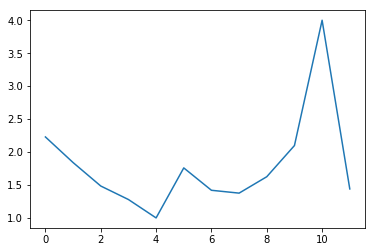

In [202]:
plt.plot((3*(conv4_frogs[:12] - conv4_frogs[:12].min()) / (conv4_frogs[:12].max() - conv4_frogs[:12].min()))+1)

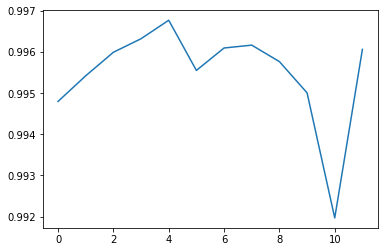

In [155]:
plt.plot(conv4_frogs_mean[:12])